<a href="https://colab.research.google.com/github/firdaaacy/Intro-Machine-Learning/blob/main/Machine%20Learning%20For%20Beginer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning adalah teknik dimana komputer dapat mengekstraksi atau mempelajari pola dari suatu data, kemudian dengan pola yang telah dipelajari dari data historis, komputer mampu mengenali dan memprediksi trend, hasil atau kejadian di masa mendatang atau dari observasi baru tanpa perlu diprogram secara eksplisit.

Dalam pembuatan model machine learning tentunya dibutuhkan data. Sekumpulan data yang digunakan dalam machine learning disebut DATASET, yang kemudian dibagi/di-split menjadi training dataset dan test dataset.

TRAINING DATASET digunakan untuk membuat/melatih model machine learning, sedangkan TEST DATASET digunakan untuk menguji performa/akurasi dari model yang telah dilatih/di-training.

Teknik atau pendekatan yang digunakan untuk membangun model disebut ALGORITHM seperti Decision Tree, K-NN, Linear Regression, Random Forest, dsb. dan output atau hasil dari proses melatih algorithm dengan suatu dataset disebut MODEL.

Umumnya dataset disajikan dalam bentuk tabel yang terdiri dari baris dan kolom. Bagian Kolom adalah FEATURE atau VARIABEL data yang dianalisa, sedangkan bagian baris adalah DATA POINT/OBSERVATION/EXAMPLE.

Hal yang menjadi target prediksi atau hal yang akan diprediksi dalam machine learning disebut LABEL/CLASS/TARGET. Dalam statistika/matematika, LABEL/CLASS/TARGET ini dinamakan dengan Dependent Variabel, dan FEATURE adalah Independent Variabel.

Machine Learning itu terbagi menjadi 2 tipe yaitu supervised dan unsupervised Learning. Jika LABEL/CLASS dari dataset sudah diketahui maka dikategorikan sebagai supervised learning, dan jika Label belum diketahui maka dikategorikan sebagai unsupervised learning,

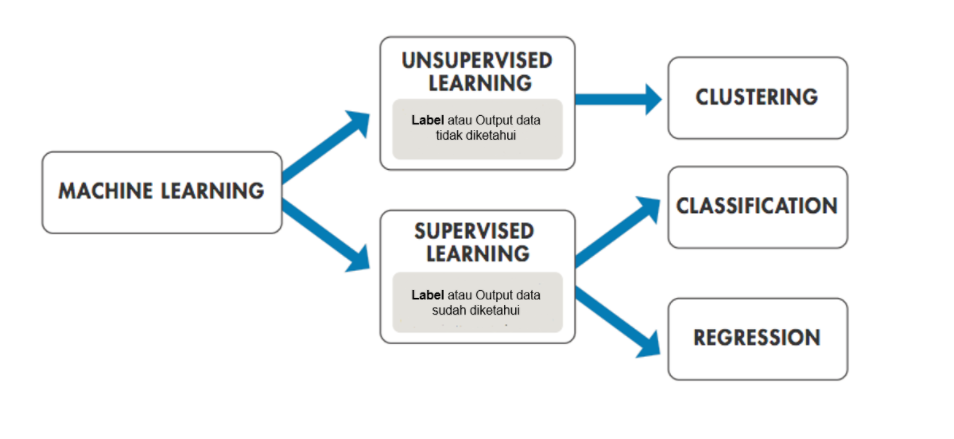

#  ***Explorasi Data : Memahami Data dengan Statistik Part 1*** 

Pertama- tama,  kita check dimensi data kita terlebih dahulu. Aksara, silahkan load datanya dan gunakan .shape, .head(), .info(), dan .describe() untuk mengeksplorasi dataset secara berurut. Dataset ini adalah data pembeli online yang mengunjungi website dari suatu e-commerce selama setahun, yaitu 'https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv'

In [24]:
import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')
print('Shape dataset:', dataset.shape)
print('\nLima data teratas:\n', dataset.head())
print('\nInformasi dataset:')
print(dataset.info())
print('\nStatistik deskriptif:\n', dataset.describe())

Shape dataset: (12330, 18)

Lima data teratas:
    Administrative  Administrative_Duration  ...  Weekend  Revenue
0             0.0                      0.0  ...    False    False
1             0.0                      0.0  ...    False    False
2             0.0                     -1.0  ...    False    False
3             0.0                      0.0  ...    False    False
4             0.0                      0.0  ...     True    False

[5 rows x 18 columns]

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Durati

# ***Explorasi Data : Memahami Data dengan Statistik Part 1***

Data eksplorasi tidaklah cukup dengan mengetahui dimensi data dan statistical properties saja, tetapi kita juga perlu sedikit menggali tentang hubungan atau korelasi dari setiap feature, karena beberapa algorithm seperti linear regression dan logistic regression akan menghasilkan model dengan performansi **yang buruk** jika kita menggunakan feature/variabel saling dependensi atau berkorelasi kuat **(multicollinearity)**. Jadi, jika kita sudah tahu bahwa data kita berkorelasi kuat, kita bisa menggunakan algorithm lain yang tidak sensitif terhadap hubungan korelasi dari feature/variabel seperti decision tree

In [25]:
dataset_corr = dataset.corr()
print('Korelasi dataset:\n', dataset.corr())
print('Distribusi Label (Revenue):\n', dataset['Revenue'].value_counts())
# Tugas praktek
print('\nKorelasi BounceRates-ExitRates: ',dataset_corr.loc['BounceRates','ExitRates'])
print('\nKorelasi Revenue-PageValues: ', dataset_corr.loc['Revenue','PageValues'])
print('\nKorelasi TrafficType-Weekend: ',dataset_corr.loc['TrafficType','Weekend'])

Korelasi dataset:
                          Administrative  ...   Revenue
Administrative                 1.000000  ...  0.138631
Administrative_Duration        0.601466  ...  0.093395
Informational                  0.376782  ...  0.095085
Informational_Duration         0.255757  ...  0.070250
ProductRelated                 0.430832  ...  0.158280
ProductRelated_Duration        0.373647  ...  0.152130
BounceRates                   -0.223474  ... -0.150621
ExitRates                     -0.316192  ... -0.206886
PageValues                     0.098771  ...  0.492569
SpecialDay                    -0.095054  ... -0.082305
OperatingSystems              -0.006459  ... -0.014668
Browser                       -0.025243  ...  0.023984
Region                        -0.005680  ... -0.011595
TrafficType                   -0.033748  ... -0.005113
Weekend                        0.026404  ...  0.029295
Revenue                        0.138631  ...  1.000000

[16 rows x 16 columns]
Distribusi Label (Reve

# **Eksplorasi Data: Memahami Data dengan Visual**

Dengan visualisasi kita dapat dengan mudah dan cepat dalam memahami data, bahkan dapat memberikan pemahaman yang lebih baik terkait hubungan setiap variabel/ features.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


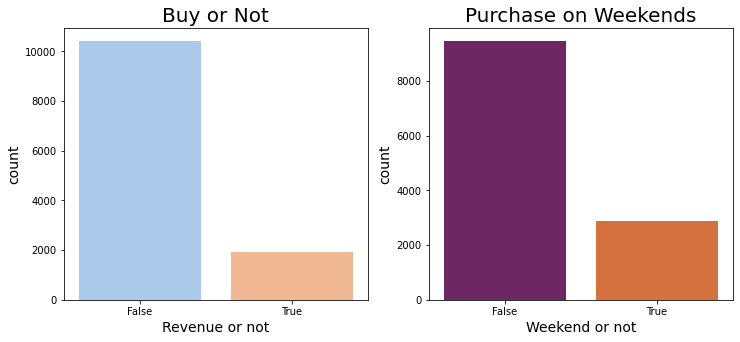

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
# checking the Distribution of customers on Revenue
plt.rcParams['figure.figsize'] = (12,5)
plt.subplot(1,2,1)
sns.countplot(dataset['Revenue'], palette = 'pastel')
plt.title('Buy or Not', fontsize=20)
plt.xlabel('Revenue or not', fontsize=14)
plt.ylabel('count', fontsize=14)
# checking the Distribution of customers on Weekend
plt.subplot(1,2,2)
sns.countplot(dataset['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize=20)
plt.xlabel('Weekend or not', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.show()

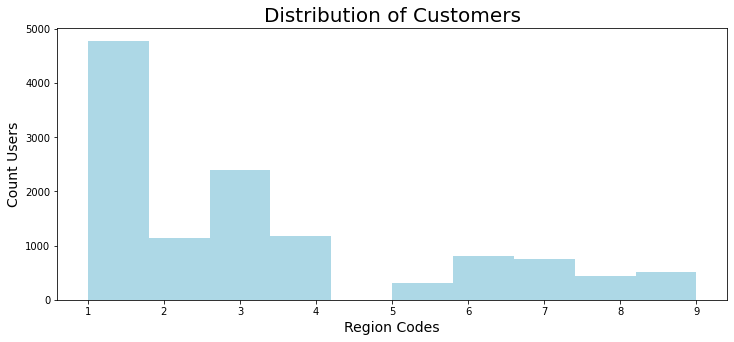

In [27]:
import matplotlib.pyplot as plt
# visualizing the distribution of customers around the Region
plt.hist(dataset['Region'], color = 'lightblue')
plt.title('Distribution of Customers', fontsize = 20)
plt.xlabel('Region Codes', fontsize = 14)
plt.ylabel('Count Users', fontsize = 14)
plt.show()

#**Data Pre-processing: Handling Missing Value - Part 1**

In [28]:
#checking missing value for each feature  
print('Checking missing value for each feature:')
print(dataset.isnull().sum())
#Counting total missing value
print('\nCounting total missing value:')
print(dataset.isnull().sum().sum())

Checking missing value for each feature:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

Counting total missing value:
112


#**Data Pre-processing: Handling Missing Value - Part 2**

In [29]:
#Drop rows with missing value   
dataset_clean = dataset.dropna()  
print('Ukuran dataset_clean:', dataset_clean.shape) 

Ukuran dataset_clean: (12316, 18)


#**Data Pre-processing: Handling Missing Value - Part 3**

In [30]:
print("Before imputation:")
# Checking missing value for each feature  
print(dataset.isnull().sum())
# Counting total missing value  
print(dataset.isnull().sum().sum())

print("\nAfter imputation:")
# Fill missing value with mean of feature value  
dataset.fillna(dataset.mean(), inplace = True)
# Checking missing value for each feature  
print(dataset.isnull().sum())
# Counting total missing value  
print(dataset.isnull().sum().sum())

Before imputation:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64
112

After imputation:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0

# **Tugas Praktek**

imputasi menggunakan median

In [31]:
import pandas as pd
dataset1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')

print("Before imputation:")
# Checking missing value for each feature  
print(dataset1.isnull().sum())
# Counting total missing value  
print(dataset1.isnull().sum().sum())

print("\nAfter imputation:")
# Fill missing value with median of feature value  
dataset1.fillna(dataset1.median(), inplace = True)
# Checking missing value for each feature  
print(dataset1.isnull().sum())
# Counting total missing value  
print(dataset1.isnull().sum().sum())

Before imputation:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64
112

After imputation:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0

# **Data Preprocessing: Scaling**

Beberapa machine learning seperti K-NN dan gradient descent mengharuskan semua variabel memiliki rentang nilai yang sama, karena jika tidak sama, feature dengan rentang nilai terbesar misalnya ProductRelated_Duration otomatis akan menjadi feature yang paling mendominasi dalam proses training/komputasi, sehingga model yang dihasilkan pun akan sangat bias. Oleh karena itu, sebelum memulai training model, kita terlebih dahulu perlu melakukan data rescaling ke dalam rentang 0 dan 1, sehingga semua feature berada dalam rentang nilai tersebut, yaitu nilai max = 1 dan nilai min = 0. Data rescaling ini dengan mudah dapat dilakukan di Python menggunakan .MinMaxScaler( ) dari Scikit-Learn library.

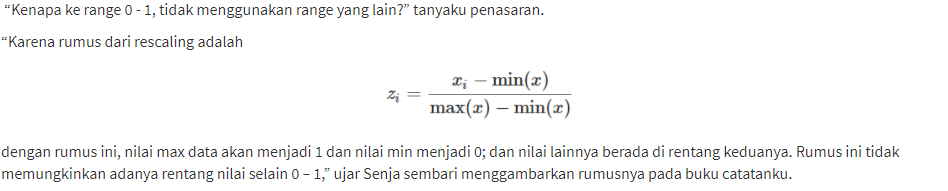

In [32]:
from sklearn.preprocessing import MinMaxScaler
#Define MinMaxScaler as scaler  
scaler = MinMaxScaler()  
#list all the feature that need to be scaled  
scaling_column = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues']
#Apply fit_transfrom to scale selected feature  
dataset[scaling_column] = scaler.fit_transform(dataset[scaling_column])
#Cheking min and max value of the scaling_column
print(dataset[scaling_column].describe().T[['min','max']])

                         min  max
Administrative           0.0  1.0
Administrative_Duration  0.0  1.0
Informational            0.0  1.0
Informational_Duration   0.0  1.0
ProductRelated           0.0  1.0
ProductRelated_Duration  0.0  1.0
BounceRates              0.0  1.0
ExitRates                0.0  1.0
PageValues               0.0  1.0


# **Data Pre-processing: Konversi string ke numerik**

In [33]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Convert feature/column 'Month'
LE = LabelEncoder()
dataset['Month'] = LE.fit_transform(dataset['Month'])
print(LE.classes_)
print(np.sort(dataset['Month'].unique()))
print('')

# Convert feature/column 'VisitorType'
LE = LabelEncoder()
dataset['VisitorType'] = LE.fit_transform(dataset['VisitorType'])
print(LE.classes_)
print(np.sort(dataset['VisitorType'].unique()))

['Aug' 'Dec' 'Feb' 'Jul' 'June' 'Mar' 'May' 'Nov' 'Oct' 'Sep']
[0 1 2 3 4 5 6 7 8 9]

['New_Visitor' 'Other' 'Returning_Visitor']
[0 1 2]


# **Pemodelan dengan Scikit-Learn**

In [34]:
# removing the target column Revenue from dataset and assigning to X
X = dataset.drop(['Revenue'], axis=1)
# assigning the target column Revenue to y
y = dataset['Revenue']
# checking the shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (12330, 17)
Shape of y: (12330,)


# **Training dan Test Dataset**

Fungsi Training adalah melatih model untuk mengenali pola dalam data, sedangkan testing berfungsi untuk memastikan bahwa model yang telah dilatih tersebut mampu dengan baik memprediksi label dari new observation dan belum dipelajari oleh model sebelumnya.

In [36]:
from sklearn.model_selection import train_test_split
# splitting the X, and y
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)
# checking the shapes
print("Shape of X_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (9864, 17)
Shape of y_train : (9864,)
Shape of X_test : (2466, 17)
Shape of y_test : (2466,)


# **Training Model: Fit**

In [37]:
from sklearn.tree import DecisionTreeClassifier
# Call the classifier
model = DecisionTreeClassifier()
# Fit the classifier to the training data
model = model.fit(X_train,y_train)

# **Training Model: Predict**

In [38]:
# Apply the classifier/model to the test data
y_pred = model.predict(X_test)
print(y_pred.shape)

(2466,)


#**Evaluasi Model Performance - Part 1**

Evaluasi bisa munculkan dengan fungsi .score( ). Tetapi, di banyak real problem, accuracy saja tidaklah cukup. Metode lain yang digunakan adalah dengan Confusion Matrix. Confusion Matrix merepresentasikan perbandingan prediksi dan real LABEL dari test dataset yang dihasilkan oleh algoritma ML.

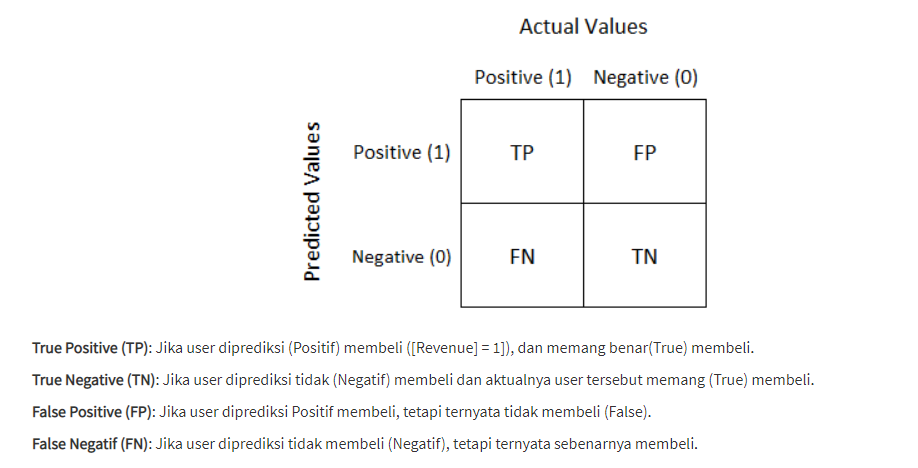

# **Evaluasi Model Performance - Part 2**

Berdasarkan confusion matrix, dapat mengukur metrik - metrik berikut :

1. Accuracy = (TP + TN ) / (TP+FP+FN+TN)
2. Precision = (TP) / (TP+FP)
3. Recall = (TP) / (TP + FN)
4. F1 Score = 2 * (Recall*Precission) / (Recall + Precission)

In [40]:
from sklearn.metrics import confusion_matrix, classification_report

# evaluating the model
print('Training Accuracy :', model.score(X_train, y_train))
print('Testing Accuracy :', model.score(X_test, y_test))

# confusion matrix
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
print('\nClassification report:')
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.8556366585563666

Confusion matrix:
[[1886  158]
 [ 198  224]]

Classification report:
              precision    recall  f1-score   support

       False       0.90      0.92      0.91      2044
        True       0.59      0.53      0.56       422

    accuracy                           0.86      2466
   macro avg       0.75      0.73      0.74      2466
weighted avg       0.85      0.86      0.85      2466



Jika dataset memiliki jumlah data False Negatif dan False Positif yang seimbang (Symmetric), maka bisa gunakan Accuracy, tetapi jika tidak seimbang, maka sebaiknya menggunakan F1-Score.

Dalam suatu problem, jika lebih memilih False Positif lebih baik terjadi daripada False Negatif, misalnya: Dalam kasus Fraud/Scam, kecenderungan model mendeteksi transaksi sebagai fraud walaupun kenyataannya bukan, dianggap lebih baik, daripada transaksi tersebut tidak terdeteksi sebagai fraud tetapi ternyata fraud. Untuk problem ini sebaiknya menggunakan Recall.

Sebaliknya, jika lebih menginginkan terjadinya True Negatif dan sangat tidak menginginkan terjadinya False Positif, sebaiknya menggunakan Precision.

Contohnya adalah pada kasus klasifikasi email SPAM atau tidak. Banyak orang lebih memilih jika email yang sebenarnya SPAM namun diprediksi tidak SPAM (sehingga tetap ada pada kotak masuk email kita), daripada email yang sebenarnya bukan SPAM tapi diprediksi SPAM (sehingga tidak ada pada kotak masuk email).

 

# **Classification - Logistic Regression**

Logistic Regression merupakan salah satu algoritma klasifikasi dasar yang cukup popular. Secara sederhana, Logistic regression hampir serupa dengan linear regression tetapi linear regression digunakan untuk Label atau Target Variable yang berupa numerik atau continuous value, sedangkan Logistic regression digunakan untuk Label atau Target yang berupa categorical/discrete value.

Contoh continuous value adalah harga rumah, harga saham, suhu, dsb; dan contoh dari categorical value adalah prediksi SPAM or NOT SPAM (1 dan 0) atau prediksi customer SUBSCRIBE atau UNSUBSCRIBED (1 dan 0).

Umumnya Logistic Regression dipakai untuk binary classification (1/0; Yes/No; True/False) problem, tetapi beberapa data scientist juga menggunakannya untuk multiclass classification problem. Logistic regression adalah salah satu linear classifier, oleh karena itu, Logistik regression juga menggunakan rumus atau fungsi yang sama seperti linear regression yaitu:


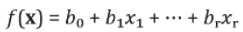

yang disebut Logit, dimana Variabel 𝑏₀, 𝑏₁, …, 𝑏ᵣ adalah koefisien regresi, dan 𝑥₁, …, 𝑥ᵣ adalah explanatory variable/variabel input atau feature.

Output dari Logistic Regression adalah 1 atau 0; sehingga real value dari fungsi logit ini perlu ditransfer ke nilai di antara 1 dan 0 dengan menggunakan fungsi sigmoid.

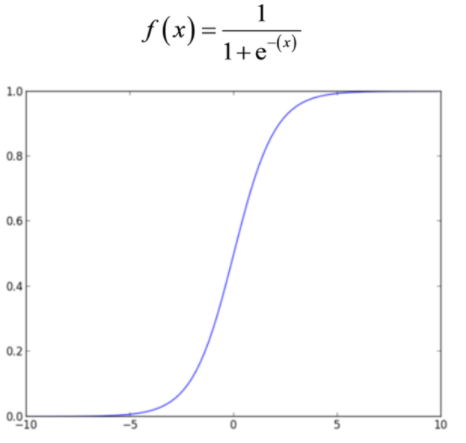


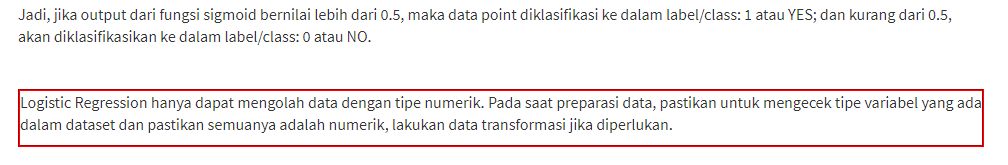